<a href="https://colab.research.google.com/github/cszafariqbal/Deep_Learning_Projects/blob/main/Titanic__survival_prediction_by_keras_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Datasets


In [ ]:
import pandas as pd
df = pd.read_csv('tiatanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print(df[['Age', 'SibSp', 'Parch', 'Fare']].describe())#int only describe excluding passengerid

              Age       SibSp       Parch        Fare
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118    0.523008    0.381594   32.204208
std     14.526497    1.102743    0.806057   49.693429
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    0.000000    0.000000    7.910400
50%     28.000000    0.000000    0.000000   14.454200
75%     38.000000    1.000000    0.000000   31.000000
max     80.000000    8.000000    6.000000  512.329200


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#Exploratoray data analysis

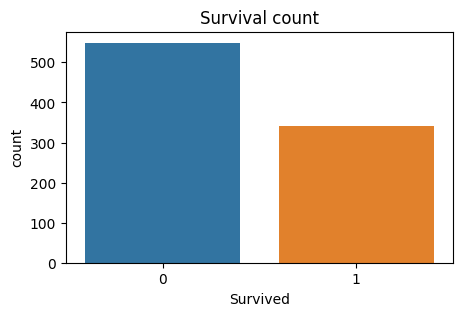

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 3))
sns.countplot(data=df, x='Survived')
plt.title('Survival count')
plt.show()

In [ ]:
print(df['Sex'].value_counts())

male      577
female    314
Name: Sex, dtype: int64


In [ ]:
sex_survived = pd.crosstab(df['Sex'], df['Survived'])
print(sex_survived)

Survived    0    1
Sex               
female     81  233
male      468  109


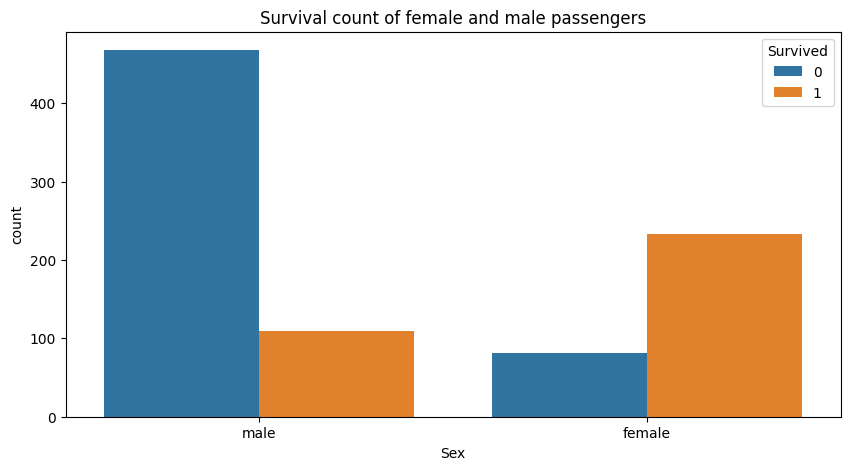

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival count of female and male passengers')
plt.show()

#Data preprocessing & Data Cleaning

In [ ]:
new_df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis =1)
new_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [ ]:
new_df = pd.get_dummies(new_df, prefix=None, dummy_na=False, columns=['Sex', 'Embarked'])

In [ ]:
new_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [ ]:

new_df.isnull().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [ ]:
import numpy as np
print(np.mean(new_df['Age']))

29.69911764705882


In [ ]:
new_df['Age'] = new_df['Age'].fillna(np.mean(new_df['Age']))

In [ ]:
new_df.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [ ]:
x = new_df.drop(['Survived'],axis = 1)
y = new_df['Survived']

#Split the dataset into trian and test dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(712, 10)
(712,)
(179, 10)
(179,)


#Train CNN Model and check accuracy

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
cls = Sequential()
cls.add(Dense(units=256, kernel_initializer='uniform', activation='relu', input_dim=10))
cls.add(Dense(units=128, kernel_initializer='uniform', activation='relu'))
cls.add(Dense(units=128, kernel_initializer='uniform', activation='relu'))
cls.add(Dense(units=64, kernel_initializer='uniform', activation='relu'))
cls.add(Dense(units=64, kernel_initializer='uniform', activation='relu'))
cls.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
cls.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
cls.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
cls.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cls.fit(x_train, y_train, batch_size=10, epochs=100, validation_data=(x_test, y_test), verbose=1)
ynew = cls.predict(x_train)

Epoch 1/100
72/72 [==============================] - 5s 11ms/step - loss: 0.6676 - accuracy: 0.6152 - val_loss: 0.5937 - val_accuracy: 0.5922
Epoch 2/100
72/72 [==============================] - 0s 6ms/step - loss: 0.6112 - accuracy: 0.6559 - val_loss: 0.5397 - val_accuracy: 0.7374
Epoch 3/100
72/72 [==============================] - 0s 6ms/step - loss: 0.5832 - accuracy: 0.6770 - val_loss: 0.5142 - val_accuracy: 0.7654
Epoch 4/100
72/72 [==============================] - 0s 6ms/step - loss: 0.5736 - accuracy: 0.7022 - val_loss: 0.5060 - val_accuracy: 0.7821
Epoch 5/100
72/72 [==============================] - 0s 6ms/step - loss: 0.5083 - accuracy: 0.7781 - val_loss: 0.4846 - val_accuracy: 0.7765
Epoch 6/100
72/72 [==============================] - 0s 6ms/step - loss: 0.5171 - accuracy: 0.7669 - val_loss: 0.4925 - val_accuracy: 0.7598
Epoch 7/100
72/72 [==============================] - 0s 6ms/step - loss: 0.5049 - accuracy: 0.7823 - val_loss: 0.4714 - val_accuracy: 0.7821
Epoch 8/100
